# Home Credit Default Risk scoring

### Import des données sur colab

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os

In [ ]:
os.listdir('/gdrive/MyDrive/Projet7')

['application_train.csv', 'P7.ipynb']

In [ ]:
import pandas as pd
data_1 =pd.read_csv('/gdrive/MyDrive/Projet7/application_train.csv')

In [ ]:
data_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(f'Training dataset contains {data_1.shape[0]} records and {data_1.shape[1]} columns.')

Training dataset contains 307511 records and 122 columns.


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Exploration des données 

In [ ]:
def missing_values(df):
        
        missing_values = df.isnull().sum()
        missing_values_percent = 100 * df.isnull().sum() / len(df)
        missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
        mis_val_table_ren_columns = missing_values_table.rename(
        columns = {0 : 'Number of Missing Values', 1 : 'Percentage of Entries Missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0
                                                             ].sort_values('Percentage of Entries Missing', ascending=False).round(1)
        
       
        return mis_val_table_ren_columns

In [ ]:
missing_values(data_1)

,Number of Missing Values,Percentage of Entries Missing
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [ ]:
data_1.duplicated().sum()

0

In [ ]:
print(data_1['TARGET'].value_counts())

0    282686
1     24825
Name: TARGET, dtype: int64


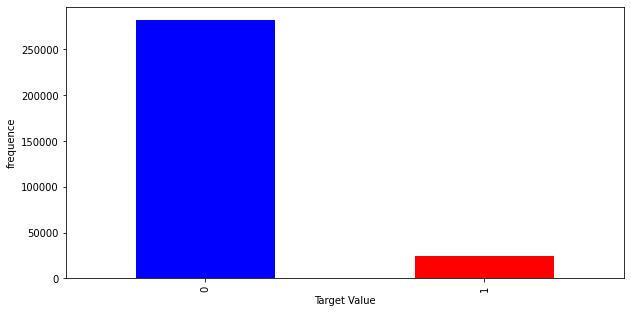

In [ ]:
import matplotlib.pyplot as plt
data_1['TARGET'].value_counts()
data_1['TARGET'].value_counts().plot(kind='bar', figsize=(10,5), color = ['blue', 'red'])
plt.xlabel('Target Value')
plt.ylabel('frequence') 
plt.show()

In [ ]:
print(data_1['CODE_GENDER'].value_counts())

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


In [ ]:
import numpy as np

In [ ]:
def plot_bars(df, col):
    
    plt.figure(figsize = (11, 5))
    
    df_high = df[df['TARGET'] == 1].groupby(col)['TARGET'].agg('count')
    df_var = df.groupby(col)['TARGET'].agg('count')
    categorical = df_high.divide(df_var, fill_value = 0) * 100

    # Convert back to df
    df_categorical = categorical.to_frame().reset_index().sort_values('TARGET', ascending = True)

    # Create plot in Plotly for interactive visualisation (with some Starling colours)
    ax = df_categorical.plot(x = col, y = 'TARGET', kind = 'barh', figsize=(5,5), color = 'black')
    ax.set_xlabel('Percentage of defaulters %')
    ax.set_ylabel(col)
    plt.title('Percentage of defaulters plot for {}'.format(col.lower()));
    plt.show()
    plt.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<Figure size 792x360 with 0 Axes>

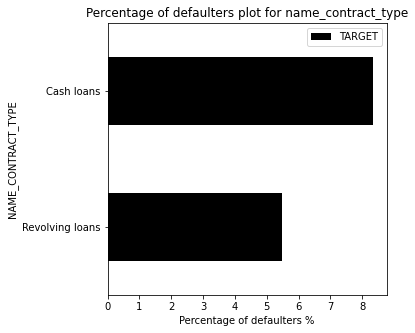

<Figure size 792x360 with 0 Axes>

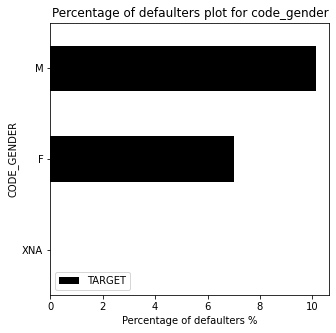

<Figure size 792x360 with 0 Axes>

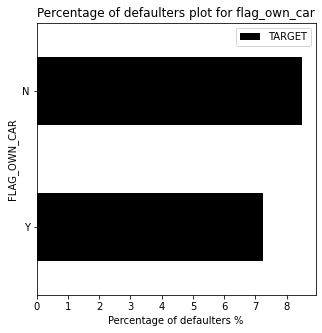

<Figure size 792x360 with 0 Axes>

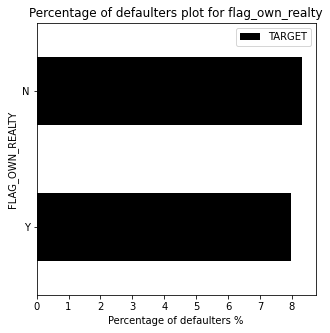

<Figure size 792x360 with 0 Axes>

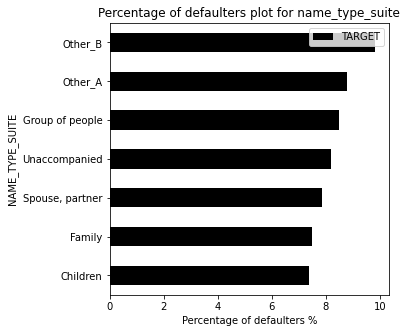

<Figure size 792x360 with 0 Axes>

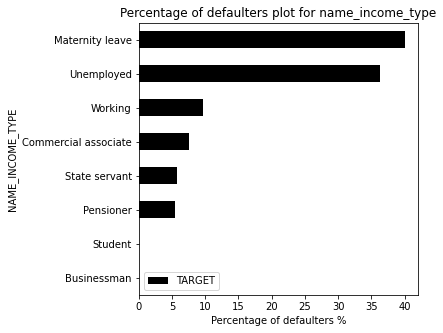

<Figure size 792x360 with 0 Axes>

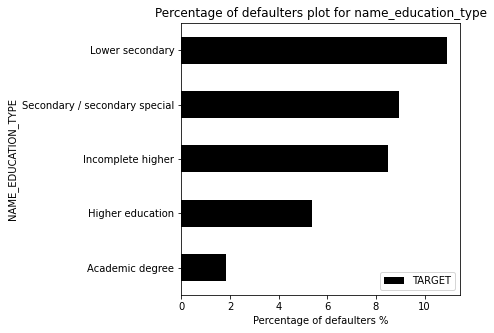

<Figure size 792x360 with 0 Axes>

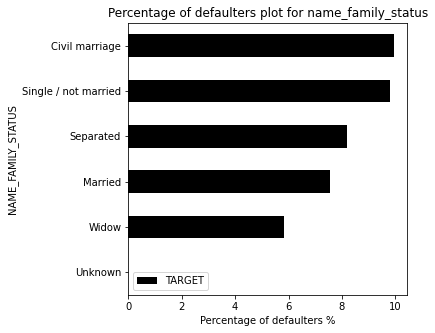

<Figure size 792x360 with 0 Axes>

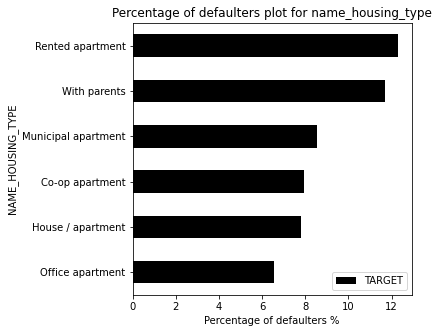

<Figure size 792x360 with 0 Axes>

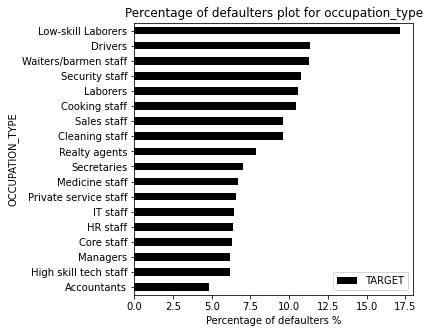

<Figure size 792x360 with 0 Axes>

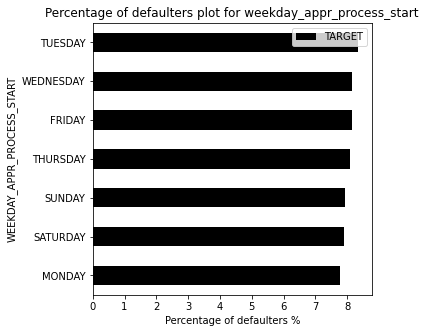

<Figure size 792x360 with 0 Axes>

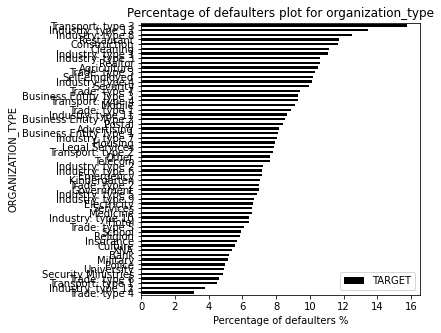

<Figure size 792x360 with 0 Axes>

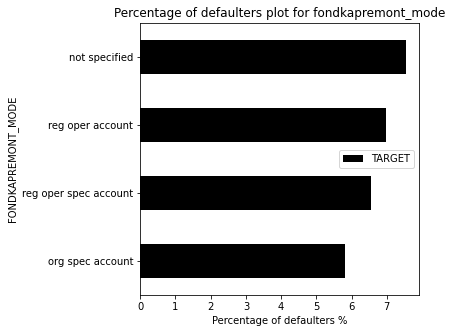

<Figure size 792x360 with 0 Axes>

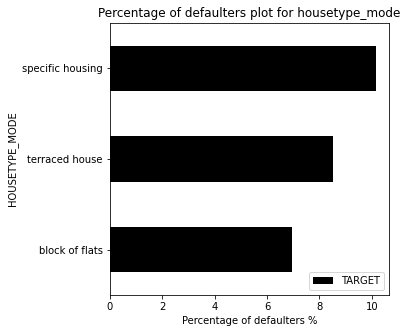

<Figure size 792x360 with 0 Axes>

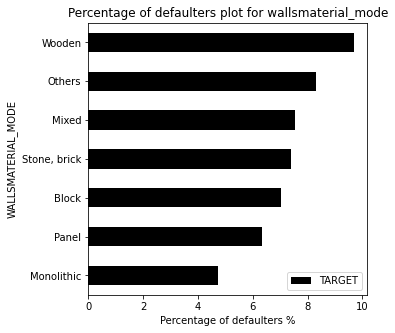

<Figure size 792x360 with 0 Axes>

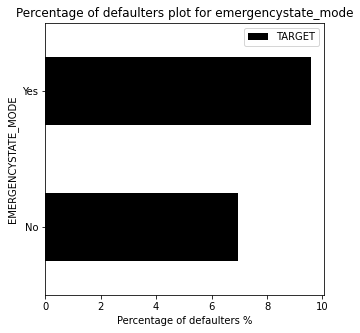

In [ ]:
for col in data_1.loc[:, data_1.dtypes == np.object].columns.values:
    plot_bars(data_1, col)

In [ ]:
data_1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
df3=data_1.copy()

In [ ]:
df3.fillna(value=df3.median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
missing_values(df3)

,Number of Missing Values,Percentage of Entries Missing
FONDKAPREMONT_MODE,210295,68.4
WALLSMATERIAL_MODE,156341,50.8
HOUSETYPE_MODE,154297,50.2
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
NAME_TYPE_SUITE,1292,0.4


### Traitement des valeurs abérentes, transformation des variables qualititatives

In [ ]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    #df = pd.read_csv('application_train.csv', nrows= num_rows)
    df=df3.copy()
    #test_df = pd.read_csv('application_test.csv', nrows= num_rows)
    #print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    #df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    #del test_df
    gc.collect()
    return df

In [ ]:
df1=application_train_test()

In [ ]:
missing_values(df1)

,Number of Missing Values,Percentage of Entries Missing
DAYS_EMPLOYED,55374,18.0
DAYS_EMPLOYED_PERC,55374,18.0


In [ ]:
df1['DAYS_EMPLOYED'] = df1['DAYS_EMPLOYED'].fillna(df1['DAYS_EMPLOYED'].median())
df1['DAYS_EMPLOYED_PERC'] = df1['DAYS_EMPLOYED_PERC'].fillna(df1['DAYS_EMPLOYED_PERC'].median())

In [ ]:
missing_values(df1)

,Number of Missing Values,Percentage of Entries Missing


In [ ]:
df1.isnull().sum()

SK_ID_CURR             0
TARGET                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
                      ..
DAYS_EMPLOYED_PERC     0
INCOME_CREDIT_PERC     0
INCOME_PER_PERSON      0
ANNUITY_INCOME_PERC    0
PAYMENT_RATE           0
Length: 247, dtype: int64

### Visualisation des nouvelles variables créées

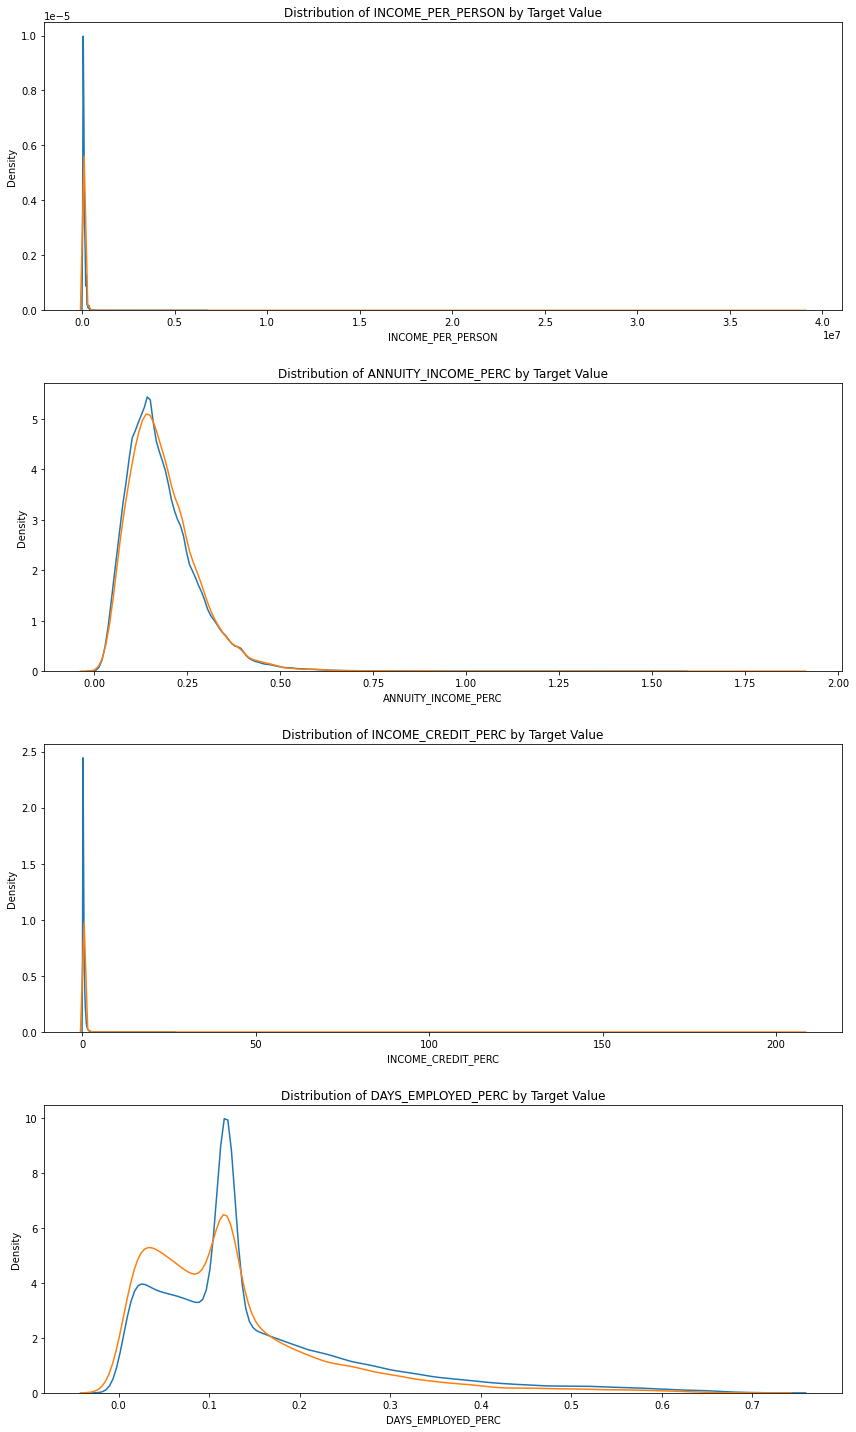

In [ ]:
plt.figure(figsize=(12,20))
for i, feature in enumerate(['INCOME_PER_PERSON','ANNUITY_INCOME_PERC','INCOME_CREDIT_PERC','DAYS_EMPLOYED_PERC']):

    plt.subplot(4,1,i+1)
    sns.kdeplot(df1.loc[df1['TARGET']==0,feature],label='target==0')
    sns.kdeplot(df1.loc[df1['TARGET']==1,feature],label='target==1')
    
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature);
    plt.ylabel('Density');
    
plt.tight_layout(h_pad=2.5)

### Analyse des corrélations des variables avec la cible

In [ ]:
correlations = df1.corr(method='pearson')['TARGET'].sort_values()

In [ ]:
print('Most Positive Correlations:\n')
print(correlations.sort_values(ascending = False).head(16))
print('\nMost Negative Correlations:\n')
print(correlations.head(15))

Most Positive Correlations:

TARGET                                               1.000000
DAYS_BIRTH                                           0.078242
DAYS_EMPLOYED                                        0.063366
REGION_RATING_CLIENT_W_CITY                          0.060895
REGION_RATING_CLIENT                                 0.058901
NAME_INCOME_TYPE_Working                             0.057483
DAYS_LAST_PHONE_CHANGE                               0.055219
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050992
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049822
FLAG_EMP_PHONE                                       0.045984
REG_CITY_NOT_LIVE_CITY                               0.044394
FLAG_DOCUMENT_3                                      0.044341
OCCUPATION_TYPE_Laborers                             0.043017
DAYS_REGISTRATION                                    0.041976
LIVE_CITY_NOT_WORK_CITY                  

In [ ]:
#df1.columns()

## Debut de la modélisation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df1.drop('TARGET', axis=1)
y = df1['TARGET']

In [ ]:
X = X.drop('SK_ID_CURR',axis=1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
oversampler = SMOTE(sampling_strategy=0.25)                     # minor/major = 1/4
undersampler = RandomUnderSampler(sampling_strategy=0.75)       # minor/major = 3/4

### Fonction de coût bancaire pour l'évaluation des modèles

In [ ]:
def function_cout(y_val1,y_pre1):
  cnf_matrix = confusion_matrix(y_val1, y_pre1)
  tn, fp, fn, tp =cnf_matrix.ravel()
  cout=tn+fp*5+fn*40+tp
  return cout

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(function_cout, greater_is_better=False)

## Model1: les arbres de décisions

#### Usage de SMOTE pour équilibrer les données

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
steps = [('over', over),('model', model)]
pip_sm_decision_t= Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
scores = cross_val_score(pip_sm_decision_t, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
pip_sm_decision_t.fit(X_train,y_train)

Pipeline(steps=[('over', SMOTE(sampling_strategy=0.1)),
                ('model', DecisionTreeClassifier())])

In [ ]:
y_pre_sm_decision_t = pip_sm_decision_t.predict(X_val)

In [ ]:
# Validating the algorithm using various Performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score, confusion_matrix

print("")
roc_sm_dec = roc_auc_score(y_val,y_pre_sm_decision_t)
c_bank_sm_dec= function_cout (y_val,y_pre_sm_decision_t)
a1_sm_dec = accuracy_score(y_val,y_pre_sm_decision_t)
f1_sm_dec = f1_score(y_val, y_pre_sm_decision_t, average="macro")
p1_sm_dec = precision_score(y_val, y_pre_sm_decision_t, average="macro")
r1_sm_dec = recall_score(y_val, y_pre_sm_decision_t, average="macro")

print("Coût bancaire SMOT Decisions trees : ",c_bank_sm_dec)
print("ROC AUC SMOT Decisions trees : ",roc_sm_dec)
print("f1 score SMOT Decisions trees : ",f1_sm_dec)
print("precision score SMOT Decisions trees: ",p1_sm_dec)
print("recall score SMOT Decisions trees : ",r1_sm_dec)


Coût bancaire SMOT Decisions trees :  241325
ROC AUC SMOT Decisions trees :  0.5432783539644234
f1 score SMOT Decisions trees :  0.539090902677356
precision score SMOT Decisions trees:  0.5364427598981175
recall score SMOT Decisions trees :  0.5432783539644234


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[51410  5127]
 [ 4085   880]]


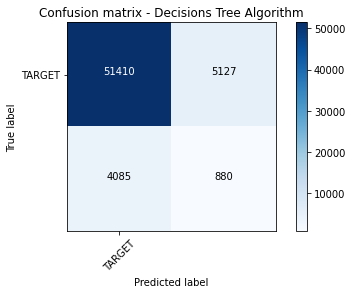

In [ ]:
# Computing Confusion matrix for the above algorithm
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, y_pre_sm_decision_t)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["TARGET"],
                      title='Confusion matrix - Decisions Tree Algorithm')

plt.show()

### Usage du RandomUnderSampler pour équilibrer les données

In [ ]:
# define pipeline2
model = DecisionTreeClassifier()
under = RandomUnderSampler(sampling_strategy=0.5)
steps1 = [('under', under),('model', model)]
pip_rdus_dec_t = Pipeline(steps=steps1)
# evaluate pipeline1
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
scores = cross_val_score(pip_rdus_dec_t, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.581


In [ ]:
pip_rdus_dec_t.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('model', DecisionTreeClassifier())])

In [ ]:
y_rdus_dec_t = pip_rdus_dec_t.predict(X_val)

In [ ]:
# Validating the algorithm using various Performance metrics

print("")
roc_rdus_dec_t = roc_auc_score(y_val,y_rdus_dec_t)
c_bank_rdus_dec_t = function_cout (y_val,y_rdus_dec_t)
a1_rdus_dec_t = accuracy_score(y_val,y_rdus_dec_t)
f1_rdus_dec_t = f1_score(y_val, y_rdus_dec_t, average="macro")
p1_rdus_dec_t = precision_score(y_val, y_rdus_dec_t, average="macro")
r1_rdus_dec_t = recall_score(y_val,y_rdus_dec_t, average="macro")
print("Coût bancaire RandomUnderSampler Decisions trees : ",c_bank_rdus_dec_t)
print("ROC AUC RandomUnderSampler Decisions trees : ",roc_rdus_dec_t)

print("f1 score RandomUnderSampler Decisions trees : ",f1_rdus_dec_t)
print("precision score RandomUnderSampler Decisions trees : ",p1_rdus_dec_t)
print("recall score RandomUnderSampler Decisions trees : ",r1_rdus_dec_t)


Coût bancaire RandomUnderSampler Decisions trees :  230812
ROC AUC RandomUnderSampler Decisions trees :  0.587008657325548
f1 score RandomUnderSampler Decisions trees :  0.5020811625996836
precision score RandomUnderSampler Decisions trees :  0.5306165558327407
recall score RandomUnderSampler Decisions trees :  0.5870086573255479


## Model2: Regression logistique 

### Usage de SMOTE pour équilibrer les données

In [51]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='lbfgs', max_iter=1000 )
over = SMOTE(sampling_strategy=0.1)
steps_2_1 = [('over', over),('model', model2)]
pip_logi_smot = Pipeline(steps=steps_2_1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
scores = cross_val_score(pip_logi_smot, X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

# Training the basic logistic regression model with training set 
pip_logi_smot.fit(X_train,y_train)

# Printing the coefficients
print("intercept ")
print(model2.intercept_)
print("")
print("coefficients ")
print(model2.coef_)

# Predicting the output of the test cases using the algorithm created above
y_pre_logi_smot = pip_logi_smot.predict(X_val)

Mean ROC AUC: 0.631
intercept 
[-1.59e-07]

coefficients 
[[-3.81e-07 -2.40e-07 -1.36e-07 -2.07e-07 -8.89e-07  3.09e-06  1.97e-06
  -3.83e-06 -6.78e-09  8.10e-05  9.98e-05  2.62e-05  8.56e-05 -9.99e-07
  -1.59e-07 -2.20e-07 -1.31e-08 -1.59e-07 -1.37e-07 -4.93e-08 -4.62e-07
  -1.48e-07 -1.34e-07 -3.04e-06 -1.33e-08 -2.90e-08 -2.23e-08 -1.24e-08
  -4.08e-08 -3.27e-08 -1.34e-07 -3.30e-07 -3.07e-07 -3.23e-08 -1.92e-08
  -1.58e-07 -1.28e-07 -9.87e-09 -3.26e-08 -3.08e-08 -6.36e-08 -4.97e-08
  -1.30e-08 -2.18e-08 -3.18e-08 -1.07e-09 -8.64e-09 -3.10e-08 -1.86e-08
  -1.58e-07 -1.29e-07 -9.16e-09 -3.05e-08 -2.92e-08 -6.21e-08 -4.86e-08
  -1.27e-08 -2.26e-08 -3.10e-08 -8.15e-10 -8.32e-09 -3.24e-08 -1.89e-08
  -1.58e-07 -1.28e-07 -9.91e-09 -3.22e-08 -3.05e-08 -6.35e-08 -4.97e-08
  -1.33e-08 -2.19e-08 -3.23e-08 -1.05e-09 -8.62e-09 -3.15e-08  9.69e-09
   1.18e-07  9.20e-09  9.64e-08  2.13e-04  3.53e-10 -1.89e-09 -1.74e-10
  -6.78e-09  3.94e-09 -9.65e-11 -7.88e-08 -5.49e-09 -6.97e-11 -8.21e-09
  -1.0

In [52]:
# Validating the algorithm using various Performance metrics

print("")
roc_logi_smot = roc_auc_score(y_val,y_pre_logi_smot)
c_logi_smot_bank= function_cout (y_val,y_pre_logi_smot)
a1_logi_smot = accuracy_score(y_val,y_pre_logi_smot)
f1_logi_smot = f1_score(y_val, y_pre_logi_smot, average="macro")
p1_logi_smot = precision_score(y_val, y_pre_logi_smot, average="macro")
r1_logi_smot = recall_score(y_val, y_pre_logi_smot, average="macro")
print("Coût bancaire logistique Smot : ",c_logi_smot_bank)
print("ROC AUC logistique Smot : ",roc_logi_smot)

print("f1 score logistique Smot : ",f1_logi_smot)
print("precision score logistique Smot : ",p1_logi_smot)
print("recall score logistique Smot: ",r1_logi_smot)


Coût bancaire logistique Smot :  255145
ROC AUC logistique Smot :  0.49998231246794134
f1 score logistique Smot :  0.47895998712268195
precision score logistique Smot :  0.45963414634146343
recall score logistique Smot:  0.49998231246794134


#### Usage du RandomUnderSampler pour équilibrer les données

In [53]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='lbfgs', max_iter=1000 )

under = RandomUnderSampler(sampling_strategy=0.5)
steps_2_1 = [('under', under),('model', model2)]
pip_logi_RDUS = Pipeline(steps=steps_2_1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
scores = cross_val_score(pip_logi_RDUS, X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

# Training the basic logistic regression model with training set 
pip_logi_RDUS.fit(X_train,y_train)

# Printing the coefficients
print("intercept ")
print(model2.intercept_)
print("")
print("coefficients ")
print(model2.coef_)

# Predicting the output of the test cases using the algorithm created above
y_pre_logi_RDUS = pip_logi_RDUS.predict(X_val)

Mean ROC AUC: 0.631
intercept 
[7.81e-08]

coefficients 
[[-1.50e-07 -9.33e-08  5.87e-08  6.76e-08 -1.00e-08  3.29e-06  1.30e-05
  -4.18e-06 -2.70e-09  2.00e-05  9.43e-05  1.46e-05  4.27e-05  1.77e-06
   7.81e-08  1.56e-07  1.58e-07  7.74e-08 -1.64e-08 -9.94e-09  1.70e-07
   4.45e-07  4.54e-07  1.42e-07  1.63e-09  2.42e-09 -4.00e-09  8.99e-08
   1.62e-07  9.86e-08 -6.73e-08 -2.36e-07 -2.11e-07 -9.77e-09 -4.56e-10
   7.42e-08  5.10e-08 -4.19e-09 -2.85e-08  1.29e-09 -2.18e-08 -4.60e-10
   2.04e-10 -3.29e-09 -1.33e-08 -9.52e-10 -6.51e-09 -8.70e-09  1.31e-10
   7.42e-08  5.23e-08 -3.87e-09 -2.61e-08  3.01e-09 -2.01e-08  6.05e-10
   2.71e-10 -3.31e-09 -1.21e-08 -6.04e-10 -6.69e-09 -1.00e-08 -2.63e-10
   7.41e-08  5.12e-08 -4.25e-09 -2.80e-08  1.62e-09 -2.16e-08 -2.88e-10
   9.16e-11 -3.19e-09 -1.35e-08 -9.54e-10 -6.58e-09 -1.43e-08  3.76e-07
   1.49e-07  3.70e-07  1.23e-07  1.45e-04  5.28e-10  2.11e-07 -2.14e-10
   5.26e-09 -3.18e-08  2.98e-10 -3.55e-08 -3.89e-09 -1.79e-10 -2.39e-09
   0.00

In [54]:
# Validating the algorithm using various Performance metrics

print("")
roc_logi_RDUS = roc_auc_score(y_val,y_pre_logi_RDUS)
c_logi_RDUS_bank= function_cout (y_val,y_pre_logi_RDUS)
a1_logi_RDUS = accuracy_score(y_val,y_pre_logi_RDUS)
f1_logi_RDUS = f1_score(y_val, y_pre_logi_RDUS, average="macro")
p1_logi_RDUS = precision_score(y_val, y_pre_logi_RDUS, average="macro")
r1_logi_RDUS = recall_score(y_val, y_pre_logi_RDUS, average="macro")
print("Coût bancaire logistique RandomUnderSampler : ",c_logi_RDUS_bank)
print("ROC AUC logistique RandomUnderSampler : ",roc_logi_RDUS)

print("f1 score logistique RandomUnderSampler : ",f1_logi_RDUS)
print("precision score logistique RandomUnderSampler : ",p1_logi_RDUS)
print("recall score logistique RandomUnderSampler : ",r1_logi_RDUS)


Coût bancaire logistique RandomUnderSampler :  250591
ROC AUC logistique RandomUnderSampler :  0.5128018010859432
f1 score logistique RandomUnderSampler :  0.5089232921047872
precision score logistique RandomUnderSampler :  0.565456221693066
recall score logistique RandomUnderSampler :  0.5128018010859432


In [55]:
#'DAYS_EMPLOYED_PERC','INCOME_CREDIT_PERC','INCOME_PER_PERSON','ANNUITY_INCOME_PERC','PAYMENT_RATE']

## Model Logistique en utilisant future selection

In [56]:
feat1=['DAYS_BIRTH','DAYS_EMPLOYED','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','NAME_INCOME_TYPE_Working','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1','DAYS_EMPLOYED_PERC','NAME_EDUCATION_TYPE_Higher education']

In [57]:
X = df1[feat1]
y = df1['TARGET']
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

#### Smote pour équilibrer les données

In [58]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
over = SMOTE(sampling_strategy=0.1)
steps_2_1 = [('over', over),('model', model2)]
pip2_log_smot = Pipeline(steps=steps_2_1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=1)
scores = cross_val_score(pip2_log_smot, X_train2,y_train2, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

# Training the basic logistic regression model with training set 
pip2_log_smot.fit(X_train2,y_train2)

# Printing the coefficients
print("intercept ")
print(model2.intercept_)
print("")
print("coefficients ")
print(model2.coef_)

# Predicting the output of the test cases using the algorithm created above
y_pre2_log_smot = pip2_log_smot.predict(X_val2)

Mean ROC AUC: 0.624
intercept 
[-0.47]

coefficients 
[[ 3.45e-05  8.21e-05  1.67e-01  1.20e-01  7.47e-02  1.04e-04  4.43e-05
  -1.21e+00 -1.08e+00 -4.82e-01 -5.30e-02 -1.25e+00]]


In [59]:
# Validating the algorithm using various Performance metrics
print("")

roc_2_log_smot = roc_auc_score(y_val,y_pre2_log_smot)
c_bank_2_log_smot= function_cout (y_val,y_pre2_log_smot)
a1_2_log_smot = accuracy_score(y_val,y_pre2_log_smot)
f1_2_log_smot = f1_score(y_val, y_pre2_log_smot, average="macro")
p1_2_log_smot = precision_score(y_val, y_pre2_log_smot, average="macro")
r1_2_log_smot = recall_score(y_val, y_pre2_log_smot, average="macro")
print("Coût bancaire logistique2 smot : ",c_bank_2_log_smot)
print("ROC AUC logistique2 smot : ",roc_2_log_smot)

print("f1 score logistique2 smot : ",f1_2_log_smot)
print("precision score logistique2 smot : ",p1_2_log_smot)
print("recall score logistique2 smot : ",r1_2_log_smot)


Coût bancaire logistique2 smot :  255137
ROC AUC logistique2 smot :  0.5
f1 score logistique2 smot :  0.47896881539152314
precision score logistique2 smot :  0.4596354590094631
recall score logistique2 smot :  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random  under sampler pour équilibrer les données de 

In [ ]:
from sklearn.linear_model import LogisticRegression
model2_21 = LogisticRegression()

under = RandomUnderSampler(sampling_strategy=0.5)
steps_2_1 = [('under', under),('model', model2_21)]

pip2_log_under = Pipeline(steps=steps_2_1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=1)
scores = cross_val_score(pip2_log_under, X_train2,y_train2, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

# Training the basic logistic regression model with training set 
pip2_log_under.fit(X_train2,y_train2)

# Printing the coefficients
print("intercept ")
print(model2_21.intercept_)
print("")
print("coefficients ")
print(model2_21.coef_)

# Predicting the output of the test cases using the algorithm created above
y_pre2_log_under = pip2_log_under.predict(X_val2)

Mean ROC AUC: 0.645
intercept 
[-0.05]

coefficients 
[[ 1.24e-05  9.24e-05  2.69e-01  2.23e-01  3.90e-01  9.94e-05  3.70e-05
  -1.02e+00 -1.02e+00 -3.63e-01 -2.34e-02 -9.48e-01]]


In [ ]:
# Validating the algorithm using various Performance metrics
print("")

roc_2_log_under = roc_auc_score(y_val,y_pre2_log_under)
c_bank_2_log_under= function_cout (y_val,y_pre2_log_under)
a1_2_log_under = accuracy_score(y_val,y_pre2_log_under)
f1_2_log_under = f1_score(y_val, y_pre2_log_under, average="macro")
p1_2_log_under = precision_score(y_val, y_pre2_log_under, average="macro")
r1_2_log_under = recall_score(y_val, y_pre2_log_under, average="macro")
print("Coût bancaire logistique2 under : ",c_bank_2_log_under)
print("ROC AUC logistique2 under : ",roc_2_log_under)

print("f1 score logistique2 under : ",f1_2_log_under)
print("precision score logistique2 under : ",p1_2_log_under)
print("recall score logistique2 under : ",r1_2_log_under)


Coût bancaire logistique2 under :  221885
ROC AUC logistique2 under :  0.5924557332104576
f1 score logistique2 under :  0.5860410050285373
precision score logistique2 under :  0.5809828524244176
recall score logistique2 under :  0.5924557332104575


## Using LightGBM Classifier

#### Smote pour équilibrer les données

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
model3 = LGBMClassifier()

steps_3_1 = [('over', over),('model', model3)]
pip_LGBM_Smot = Pipeline(steps=steps_3_1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores = cross_val_score(pip_LGBM_Smot, X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

pip_LGBM_Smot.fit(X_train,y_train)

# Predicting the output of the test cases using the algorithm created above
y_pre_lgm_Smot = pip_LGBM_Smot.predict(X_val)

In [ ]:
# Validating the algorithm using various Performance metrics

print("")
roc_lgm_Smot = roc_auc_score(y_val,y_pre_lgm_Smot)
c_bank_lgm_Smot= function_cout (y_val,y_pre_lgm_Smot)
a1_lgm_Smot = accuracy_score(y_val,y_pre_lgm_Smot)
f1_lgm_Smot = f1_score(y_val, y_pre_lgm_Smot, average="macro")
p1_lgm_Smot = precision_score(y_val,y_pre_lgm_Smot, average="macro")
r1_lgm_Smot = recall_score(y_val, y_pre_lgm_Smot, average="macro")
print("Coût bancaire LGBMClassifier Smot : ",c_bank_lgm_Smot)
print("ROC AUC LGBMClassifier Smot: ",roc_lgm_Smot)

print("f1 score LGBMClassifier Smot : ",f1_lgm_Smot)
print("precision score LGBMClassifier Smot : ",p1_lgm_Smot)
print("recall score LGBMClassifier Smot : ",r1_lgm_Smot)

#### Usage du RandomUnderSampler pour équilibrer les données

In [ ]:
model3 = LGBMClassifier()

under = RandomUnderSampler(sampling_strategy=0.5)
steps_2_1 = [('under', under),('model', model3)]

pip_LGBM_RDUS = Pipeline(steps=steps_2_1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores = cross_val_score(pip_LGBM_RDUS, X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

pip_LGBM_RDUS.fit(X_train,y_train)

# Predicting the output of the test cases using the algorithm created above
y_pre_lgm_rdus = pip_LGBM_RDUS.predict(X_val)

In [ ]:
# Validating the algorithm using various Performance metrics

print("")
roc_lgm_rdus = roc_auc_score(y_val,y_pre_lgm_rdus)
c_bank_lgm_rdus= function_cout (y_val,y_pre_lgm_rdus)
a1_lgm_rdus = accuracy_score(y_val,y_pre_lgm_rdus)
f1_lgm_rdus = f1_score(y_val, y_pre_lgm_rdus, average="macro")
p1_lgm_rdus = precision_score(y_val,y_pre_lgm_rdus, average="macro")
r1_lgm_rdus = recall_score(y_val, y_pre_lgm_rdus, average="macro")
print("Coût bancaire LGBMClassifier RandomUnderSampler : ",c_bank_lgm_rdus)
print("ROC AUC LGBMClassifier RandomUnderSampler: ",roc_lgm_rdus)

print("f1 score LGBMClassifier RandomUnderSampler : ",f1_lgm_rdus)
print("precision score LGBMClassifier RandomUnderSampler : ",p1_lgm_rdus)
print("recall score LGBMClassifier RandomUnderSampler : ",r1_lgm_rdus)

### LGM avec une selection des données

#### Usage du Smot pour équilibrer les données

In [ ]:
X = df1[feat1]
y = df1['TARGET']
X_train3, X_val3, y_train3, y_val3 = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [ ]:
model3 = LGBMClassifier()

steps_3_2 = [('over', over),('model', model3)]
pip_LGBM_Smot2 = Pipeline(steps=steps_3_2)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores = cross_val_score(pip_LGBM_Smot2, X_train3,y_train3, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

pip_LGBM_Smot2.fit(X_train3,y_train3)

# Predicting the output of the test cases using the algorithm created above
y_pre_LGBM_Smot2 = pip_LGBM_Smot2.predict(X_val3)

In [ ]:
# Validating the algorithm using various Performance metrics

print("")
roc_LGBM_Smot2 = roc_auc_score(y_val3,y_pre_LGBM_Smot2)
c_bank_LGBM_Smot2= function_cout (y_val3,y_pre_LGBM_Smot2)
a1_LGBM_Smot2 = accuracy_score(y_val3,y_pre_LGBM_Smot2)
f1_LGBM_Smot2 = f1_score(y_val3,y_pre_LGBM_Smot2, average="macro")
p1_LGBM_Smot2 = precision_score(y_val3,y_pre_LGBM_Smot2, average="macro")
r1_LGBM_Smot2 = recall_score(y_val3,y_pre_LGBM_Smot2, average="macro")
print("Coût bancaire LGBMClassifier Smot future selection : ",c_bank_LGBM_Smot2)
print("ROC AUC LGBMClassifier Smot future selection : ",roc_LGBM_Smot2)

print("f1 score LGBMClassifier Smot future selection : ",f1_LGBM_Smot2)
print("precision score LGBMClassifier Smot future selection : ",p1_LGBM_Smot2)
print("recall score LGBMClassifier Smot future selection: ",r1_LGBM_Smot2)

In [ ]:
from sklearn import datasets, preprocessing, model_selection, ensemble, pipeline

#### Usage du RandomUnderSampler pour équilibrer les données

In [ ]:
model3 = LGBMClassifier()

under = RandomUnderSampler(sampling_strategy=0.5)
steps_2_1 = [('under', under),('model', model3)]

pip_LGBM_RDUS2 = Pipeline(steps=steps_2_1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores = cross_val_score(pip_LGBM_RDUS2, X_train3,y_train3, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

pip_LGBM_RDUS2.fit(X_train3,y_train3)

# Predicting the output of the test cases using the algorithm created above
y_pre_lgm_rdus2 = pip_LGBM_RDUS2.predict(X_val3)

In [ ]:
# Validating the algorithm using various Performance metrics

print("")
roc_lgm_rdus2 = roc_auc_score(y_val,y_pre_lgm_rdus2)
c_bank_lgm_rdus2= function_cout (y_val,y_pre_lgm_rdus2)
a1_lgm_rdus2 = accuracy_score(y_val,y_pre_lgm_rdus2)
f1_lgm_rdus2 = f1_score(y_val, y_pre_lgm_rdus2, average="macro")
p1_lgm_rdus2 = precision_score(y_val,y_pre_lgm_rdus2, average="macro")
r1_lgm_rdus2 = recall_score(y_val, y_pre_lgm_rdus2, average="macro")
print("Coût bancaire LGBMClassifier RandomUnderSampler Feature selection : ",c_bank_lgm_rdus2)
print("ROC AUC LGBMClassifier RandomUnderSampler Feature selection: ",roc_lgm_rdus2)

print("f1 score LGBMClassifier RandomUnderSampler Feature selection : ",f1_lgm_rdus2)
print("precision score LGBMClassifier RandomUnderSampler Feature selection : ",p1_lgm_rdus2)
print("recall score LGBMClassifier RandomUnderSampler Feature selection : ",r1_lgm_rdus2)

## Optimisation des hyperparametres du model LightGBM Classifier, avec équilibrage Random Under Sampler

In [ ]:
start = time.time()
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()
#Define the parameters
parameters = {'model__num_leaves':[20,40,60,80,100], 'model__min_child_samples':[5,10,15],'model__max_depth':[-1,5,10,20],
             'model__learning_rate':[0.05,0.1,0.2],'model__reg_alpha':[0,0.01,0.03]}
#Define the scoring
under = RandomUnderSampler(sampling_strategy=0.5)
steps1 = [('under', under),('model', lgb)]
pipeline1 = Pipeline(steps=steps1)

clf=RandomizedSearchCV(pipeline1,parameters,scoring=ftwo_scorer,cv=2,
                                refit=True,
                                verbose=True)
clf.fit(X=X_train, y=y_train)

print(clf.best_params_)
print(clf.best_score_)

predicted=clf.predict(X_val)
print('Classification of the result is:')
print(accuracy_score(y_val, predicted))
print(function_cout (y_val, predicted))
print(roc_auc_score (y_val, predicted))

end = time.time()
print('Execution time is:')
print(end - start)

In [ ]:
opt_parameters = {'model__reg_alpha': 0.03, 'model__num_leaves': 100, 'model__min_child_samples': 15, 'model__max_depth': 10, 'model__learning_rate': 0.1}

In [ ]:
model_final = LGBMClassifier (model__reg_alpha = 0.03, 
                             model__num_leaves = 100, 
                             model__min_child_samples = 15,
                             model__max_depth = 10, 
                             model__learning_rate = 0.1)

under = RandomUnderSampler(sampling_strategy=0.5)
steps_2_1 = [('under', under),('model', model_final)]

pip_Final = Pipeline(steps=steps_2_1)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
scores2 = cross_val_score(pip_Final, X_train,y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores2))

pip_Final.fit(X_train,y_train)

# Predicting the output of the test cases using the algorithm created above
y_pre_final = pip_Final.predict(X_val)
roc_final = roc_auc_score(y_val,y_pre_final)
print("ROC AUC LGBMClassifier final model: ",roc_final)


In [ ]:
pip_Final.score (X_train,y_train)

In [ ]:
pip_Final.score (X_val,y_val)

# Deploiement du modèle